In [1]:
!pip install pmdarima

In [2]:
import pandas as pd
import numpy as np

In [6]:
df=pd.read_csv('Desktop/Tetley Green Tea Lemon & Honey 100S Teabags.csv')
df=df.dropna()
df.head()

,Month,Sales
0,21-Apr,4612272.05
1,21-May,6234826.24
2,21-Jun,6776599.59
3,21-Jul,4612883.42
4,21-Aug,4240096.38


<AxesSubplot:>

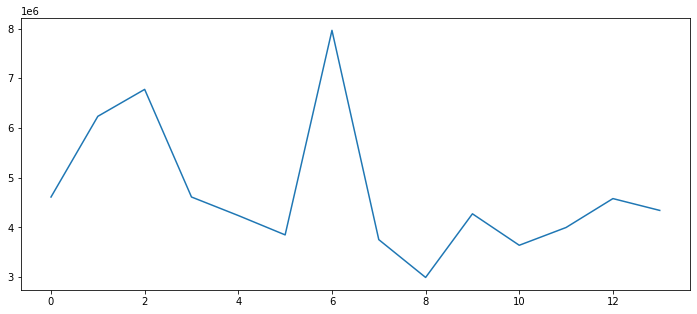

In [8]:
df['Sales'].plot(figsize=(12,5))

In [13]:
from statsmodels.tsa.stattools import adfuller

def ad_test(dataset):
    dftest = adfuller(dataset, autolag = 'AIC')
    print("1. ADF : ",dftest[0])
    print("2. P-value : ",dftest[1])
    print("3. No of Lags : ",dftest[2])
    print("4. No of observation : ",dftest[3])
    print("5. Critical Value : ")
    for key, val in dftest[4].items():
        print("\t",key, ": ",val)

In [14]:
ad_test(df['Sales'])

1. ADF :  -3.1589423158394263
2. P-value :  0.022487697638552146
3. No of Lags :  0
4. No of observation :  13
5. Critical Value : 
	 1% :  -4.068853732362312
	 5% :  -3.1271488757396453
	 10% :  -2.7017297633136095


In [15]:
from pmdarima import auto_arima
import warnings
warnings.filterwarnings("ignore")

In [17]:
from statsmodels.tsa.arima_model import ARIMA

In [18]:
print(df.shape)

(14, 2)


In [66]:
train=df.iloc[:-30]
test=df.iloc[-30:]
print(train.shape,test.shape)

(0, 2) (14, 2)


In [102]:
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm
model = sm.tsa.arima.ARIMA(df['Sales'], order=(2,0,2))
model_fit = model.fit()
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Sales   No. Observations:                   14
Model:                 ARIMA(2, 0, 2)   Log Likelihood                -216.506
Date:                Mon, 05 Sep 2022   AIC                            445.012
Time:                        15:47:43   BIC                            448.847
Sample:                             0   HQIC                           444.658
                                 - 14                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.706e+06   3.37e+05     13.950      0.000    4.04e+06    5.37e+06
ar.L1          0.7240      0.395      1.834      0.067      -0.050       1.498
ar.L2         -0.9129      0.219     -4.160      0.000      -1.343      -0.483
ma.L1         -0.9549      0.583     -1.637      0.102      -2.098       0.189
ma.L2          1.0000      0.672      1.489      0.137      -0.317       2.317
sigma2      1.117e+12   4.22e-07   2.65e+18      0.000    1.12e+12    1.12e+12
===================================================================================
Ljung-Box (L1) (Q):                   0.62   Jarque-Bera (JB):                 1.53
Prob(Q):                              0.43   Prob(JB):                         0.47
Heteroskedasticity (H):               0.68   Skew:                             0.76
Prob(H) (two-sided):                  0.68   Kurtosis:                         2.43
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 4.57e+39. Standard errors may be unstable.
"""

In [103]:
start=len(train)
end=len(train)+len(test)-1
pred=model_fit.predict(start=start,end=end,typ='levels')
print(pred)

0     4.705969e+06
1     4.714510e+06
2     4.556034e+06
3     4.046652e+06
4     4.055713e+06
5     4.758372e+06
6     5.467907e+06
7     4.878170e+06
8     4.183621e+06
9     4.433645e+06
10    5.053035e+06
11    5.459628e+06
12    5.238289e+06
13    4.543309e+06
Name: predicted_mean, dtype: float64


<AxesSubplot:>

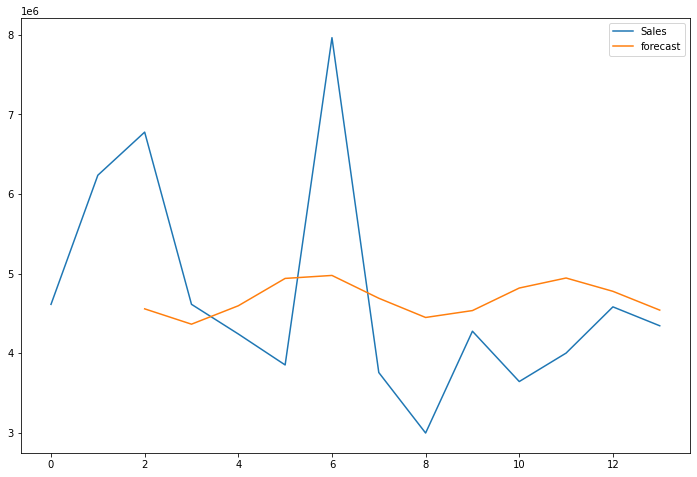

In [104]:
df['forecast']=model_fit.predict(start=2,end=13,dynamic=True)
df[['Sales','forecast']].plot(figsize=(12,8))
#model_fit.plot_predict(dynamic=False)

<AxesSubplot:>

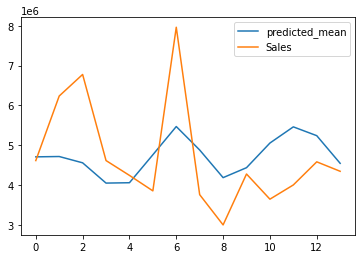

In [105]:
pred.plot(legend=True)
test['Sales'].plot(legend=True)

In [106]:
test['Sales'].mean()

4705968.965714285

In [107]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse=sqrt(mean_squared_error(pred,test['Sales']))
print(rmse)

1251994.9190188588


In [112]:
model2 = sm.tsa.arima.ARIMA(df['Sales'], order=(2,0,2))
model2_fit = model2.fit()
df.tail()
#model_fit.summary()

,Month,Sales,forecast
9,22-Jan,4274876.50,4.534198e+06
10,22-Feb,3642421.83,4.817519e+06
11,22-Mar,4000000.00,4.943538e+06
12,22-Apr,4580822.71,4.776132e+06
13,22-May,4343171.51,4.539891e+06


In [109]:
pred=model2_fit.predict(start=len(df),end=len(df)+180,typ='levels').rename('AREMA PRED')
#pred.index=index_future_dates
#test['Sales'].plot(legend=True)
print(pred)

14     4.147852e+06
15     4.452388e+06
16     5.031881e+06
17     5.173416e+06
18     4.746871e+06
           ...     
190    4.705819e+06
191    4.706010e+06
192    4.706135e+06
193    4.706052e+06
194    4.705877e+06
Name: AREMA PRED, Length: 181, dtype: float64


<AxesSubplot:>

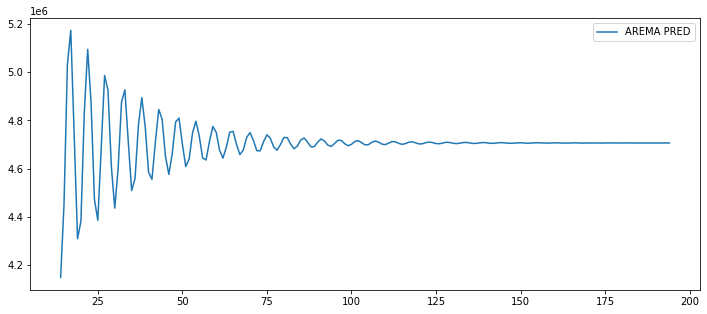

In [110]:
pred.plot(figsize=(12,5),legend=True)